# PS 1
### Zhou Xing

In [1]:
import numpy as np
import pandas as pd

%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV, LeaveOneOut

from scipy.stats import gaussian_kde

## Prob 1
### (a)

In [2]:
# Load the dataset
covid = pd.read_csv("data/COVIDincubation.txt")
covid.head()

,gender,age,symp_days
0,F,52.0,5.0
1,M,42.0,6.5
2,F,32.0,3.0
3,M,22.0,4.0
4,M,41.0,8.0


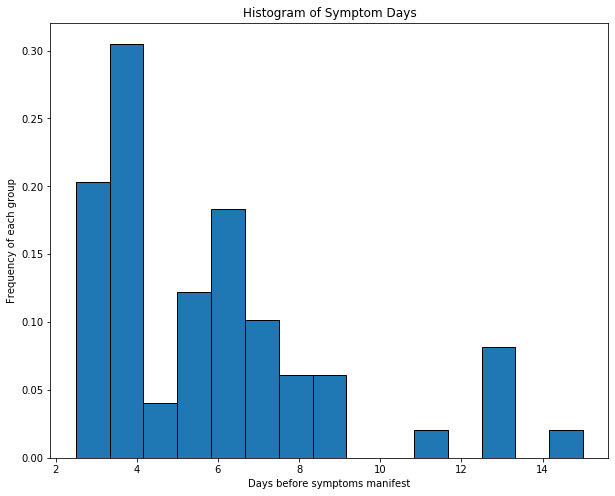

In [17]:
%matplotlib inline
symp_days_all = covid["symp_days"].values
fig = plt.figure(figsize=(10,8))
plt.hist(symp_days_all, bins=15, density=True, edgecolor='black')
plt.xlabel("Days before symptoms manifest")
plt.ylabel("Frequency of each group")
plt.title("Histogram of Symptom Days")
plt.show();

Text(0.5, 1.0, 'Histogram of Symptom Days (Age $\\leq$ 40)')

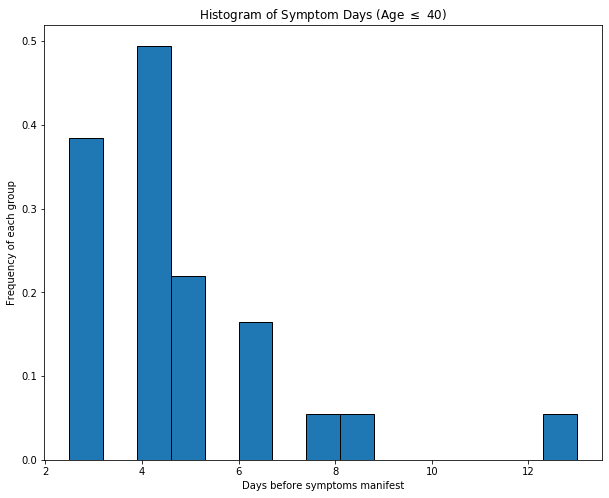

In [18]:
symp_days_younger_40 = covid.loc[covid["age"] <= 40]["symp_days"]
fig = plt.figure(figsize=(10,8))
plt.hist(symp_days_younger_40, bins=15, density=True, edgecolor='black')
plt.xlabel("Days before symptoms manifest")
plt.ylabel("Frequency of each group")
plt.title(r"Histogram of Symptom Days (Age $\leq$ 40)")

Text(0.5, 1.0, 'Histogram of Symptom Days (Age $>$ 40)')

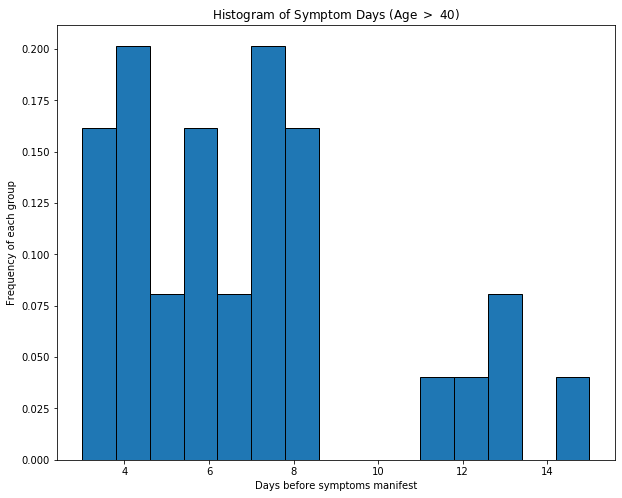

In [19]:
symp_days_older_40 = covid.loc[covid["age"] > 40]["symp_days"]
fig = plt.figure(figsize=(10,8))
plt.hist(symp_days_older_40, bins=15, density=True, edgecolor='black')
plt.xlabel("Days before symptoms manifest")
plt.ylabel("Frequency of each group")
plt.title(r"Histogram of Symptom Days (Age $>$ 40)")

### (b)

In [6]:
bandwidths = 10 ** np.linspace(-1, 1, 500)

grid_all = GridSearchCV(
    KernelDensity(kernel="gaussian"),
    {"bandwidth": bandwidths},
    cv=LeaveOneOut()
)
grid_all.fit(symp_days_all[:, None])
opt_all = grid_all.best_params_['bandwidth']
print("The optimal bandwidths for KDE of all the sample is {}.".format(opt_all))


kde_all = KernelDensity(bandwidth=opt_all, kernel="gaussian")
kde_all.fit(symp_days_all[:, None])

The optimal bandwidths for KDE of all the sample is 0.8910453324821516.


KernelDensity(algorithm='auto', atol=0, bandwidth=0.8910453324821516,
              breadth_first=True, kernel='gaussian', leaf_size=40,
              metric='euclidean', metric_params=None, rtol=0)

In [7]:

#  age <= 40 sample
bandwidths = 10 ** np.linspace(-1, 1, 500)

grid_young = GridSearchCV(
    KernelDensity(kernel="gaussian"),
    {"bandwidth": bandwidths},
    cv=LeaveOneOut()
)
grid_young.fit(symp_days_younger_40[:, None])
opt_young = grid_young.best_params_['bandwidth']
print(r"The optimal bandwidths for KDE of age<=40 sample is {}.".format(opt_young))

kde_young = KernelDensity(bandwidth=opt_young, kernel="gaussian")
kde_young.fit(symp_days_younger_40[:, None])

The optimal bandwidths for KDE of age<=40 sample is 1.6233824316122782.


KernelDensity(algorithm='auto', atol=0, bandwidth=1.6233824316122782,
              breadth_first=True, kernel='gaussian', leaf_size=40,
              metric='euclidean', metric_params=None, rtol=0)

In [8]:
# Choose an optimal bandwidth for the age > 40 sample
bandwidths = 10 ** np.linspace(-1, 1, 500)

grid_old = GridSearchCV(
    KernelDensity(kernel="gaussian"),
    {"bandwidth": bandwidths},
    cv=LeaveOneOut()
)
grid_old.fit(symp_days_older_40[:, None])
opt_old = grid_old.best_params_['bandwidth']
print(r"The optimal bandwidths for KDE of age>40  sample is {}.".format(opt_old))

# Instantiate and fit the age > 40 sample KDE model
kde_old = KernelDensity(bandwidth=opt_old, kernel="gaussian")
kde_old.fit(symp_days_older_40[:, None])

The optimal bandwidths for KDE of age>40  sample is 1.1861737164524786.


KernelDensity(algorithm='auto', atol=0, bandwidth=1.1861737164524786,
              breadth_first=True, kernel='gaussian', leaf_size=40,
              metric='euclidean', metric_params=None, rtol=0)

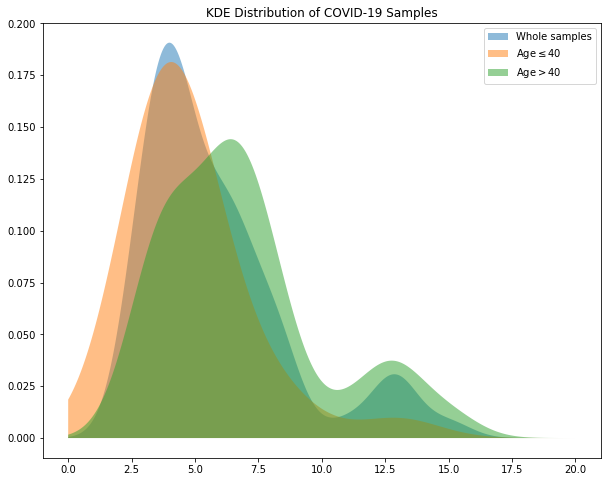

In [20]:
x_d = np.linspace(0, 20, 1000)

log_prob_all = kde_all.score_samples(x_d[:, None])
log_prob_young = kde_young.score_samples(x_d[:, None])
log_prob_old = kde_old.score_samples(x_d[:, None])

fig = plt.figure(figsize=(10,8))

plt.fill_between(x_d, np.exp(log_prob_all),alpha=0.5, label="Whole samples")
plt.fill_between(x_d, np.exp(log_prob_young),alpha=0.5, label=r"Age$\leq$40")
plt.fill_between(x_d, np.exp(log_prob_old),alpha=0.5, label=r"Age$>$40")

plt.title("KDE Distribution of COVID-19 Samples")
plt.legend()
plt.show();

### (c)
From KDE Distribution of three groups, Young individuals' ($Age \leq 40$) COVID-19 incubation has a lower mean than old inviduals ($Age \gt 40$). Young people have a peak incubation of about 5 days and old people have two peaks around 7 and 13 days.

## Problem 2
### (a)

In [10]:
bq_data = np.loadtxt("data/BQ_probmat.txt", delimiter=",")

In [11]:
print("Shape of bq_data: ", bq_data.shape)
print("Bequest by income group: ", bq_data.sum(axis=0))
print("Sum of frequencies: ", bq_data.sum())

Shape of bq_data:  (73, 7)
Bequest by income group:  [0.01214584 0.00817072 0.01590964 0.0139963  0.01383075 0.06927237
 0.86667437]
Sum of frequencies:  1.0000000000000002


Text(0.5, 0, 'Percent of BQ Received')

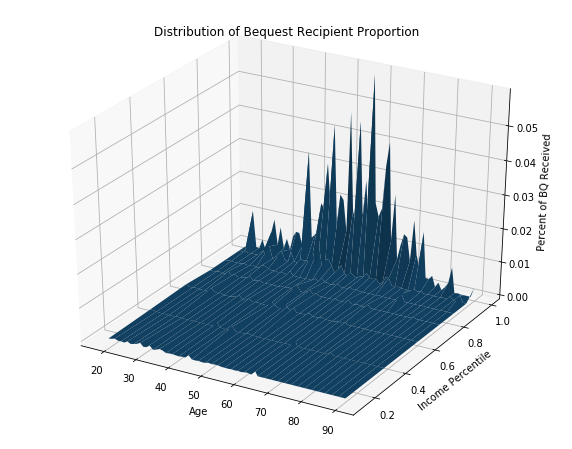

In [21]:
age_vec = np.arange(18, 91)
lambdas = np.array([0.25, 0.25, 0.20, 0.10, 0.10, 0.09, 0.01])
lambdas_mdpts = np.array([0.125, 0.375, 0.60, 0.75, 0.85, 0.94, 0.995])
income_mat, age_mat = np.meshgrid(lambdas_mdpts, age_vec)

fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection="3d")
ax.plot_surface(age_mat, income_mat, bq_data)
ax.set_title("Distribution of Bequest Recipient Proportion")
ax.set_xlabel("Age")
ax.set_ylabel("Income Percentile")
ax.set_zlabel("Percent of BQ Received")

### (b)

In [13]:
bq = pd.read_csv("data/BQ_ind_data.txt")
bq.head()

,age,income_pctl
0,18,0.125
1,18,0.125
2,18,0.125
3,18,0.125
4,18,0.125


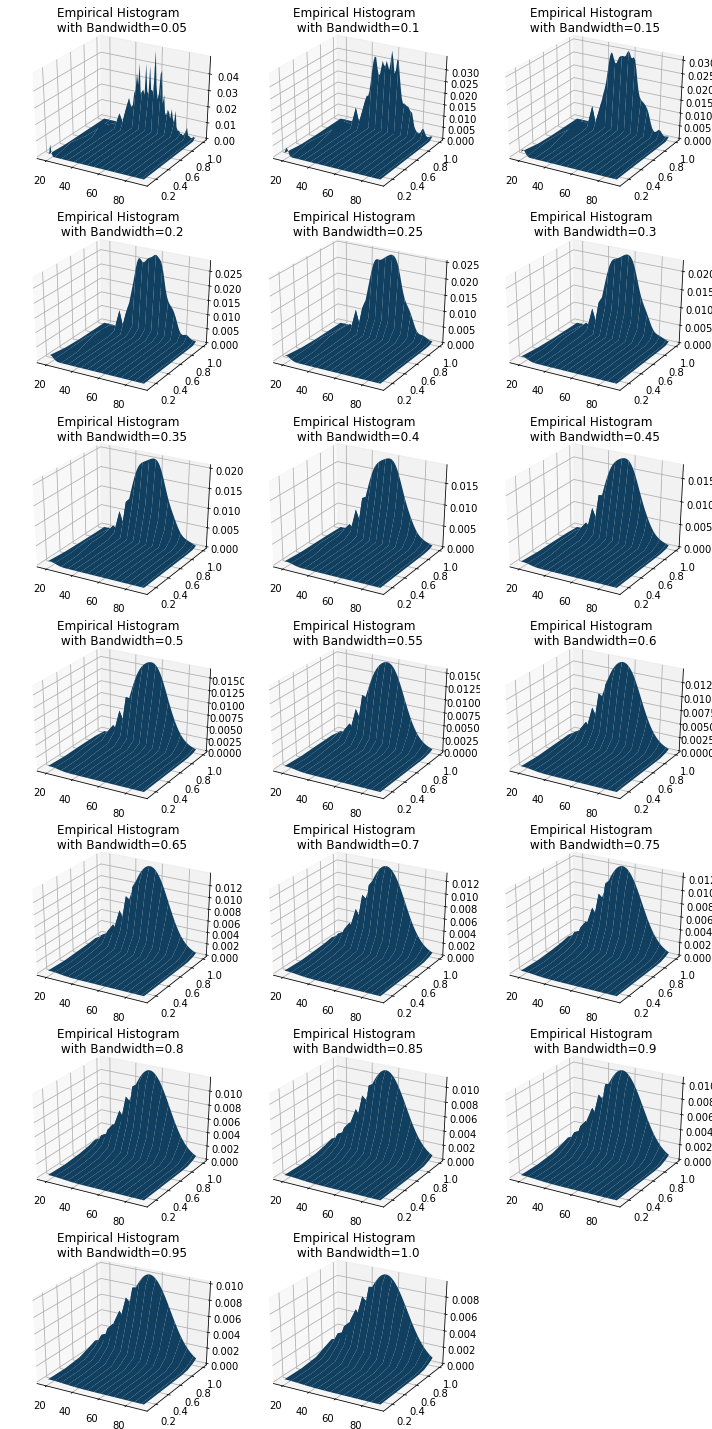

In [14]:
fig = plt.figure(figsize=(10, 20))
gs = fig.add_gridspec(7, 3)
coords = np.vstack([items.ravel() for items in [age_mat, income_mat]])

bandwidth = 0.0
for i in range(7):
    for j in range(3):
        bandwidth += 0.05
        kernel = gaussian_kde(bq.T, bw_method=bandwidth)
        
        Z = np.reshape(kernel(coords), age_mat.shape)
        Z_scaled = Z / float(np.sum(Z))
        
        ax = fig.add_subplot(gs[i, j], projection="3d")
        ax.plot_surface(age_mat, income_mat, Z_scaled, rstride=5)
        ax.set_title("Empirical Histogram \n with Bandwidth={}".format(round(bandwidth, 2), fontsize=5))
        
        if bandwidth >= 1:
            break
    if bandwidth >= 1:
        break
plt.tight_layout()

From figure above, $\lambda=0.35$ would be selected since for this parameter bias and variance are balanced, shown with a smooth surface.

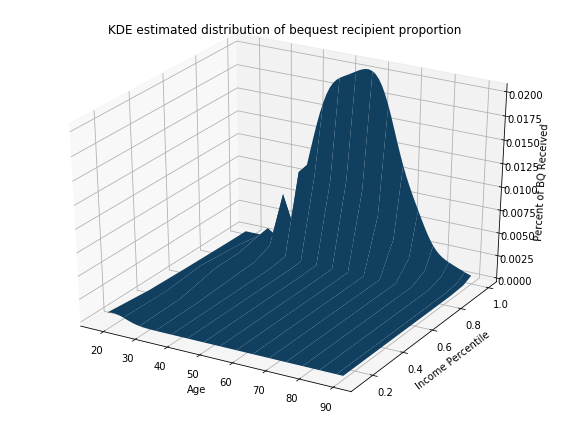

In [15]:
bandwidth = 0.35
kernel = gaussian_kde(bq.T, bw_method=bandwidth)

coords = np.vstack([items.ravel() for items in [age_mat, income_mat]])
Z = np.reshape(kernel(coords), age_mat.shape)
Z_scaled = Z / float(np.sum(Z))

fig = plt.figure(figsize=(8, 6))
ax = fig.gca(projection="3d")
ax.plot_surface(age_mat, income_mat, Z_scaled, rstride=5)
ax.set_title('KDE estimated distribution of bequest recipient proportion')
ax.set_xlabel("Age")
ax.set_ylabel("Income Percentile")
ax.set_zlabel("Percent of BQ Received")
plt.tight_layout()

In [16]:
# Calculate the estimated density
print("The estimated density for bequest recipient who are aged 61 in the 6th life income category is {}."\
      .format(Z_scaled[61 - 18 + 1][5]))

The estimated density for bequest recipient who are aged 61 in the 6th life income category is 0.006277338102472332.
